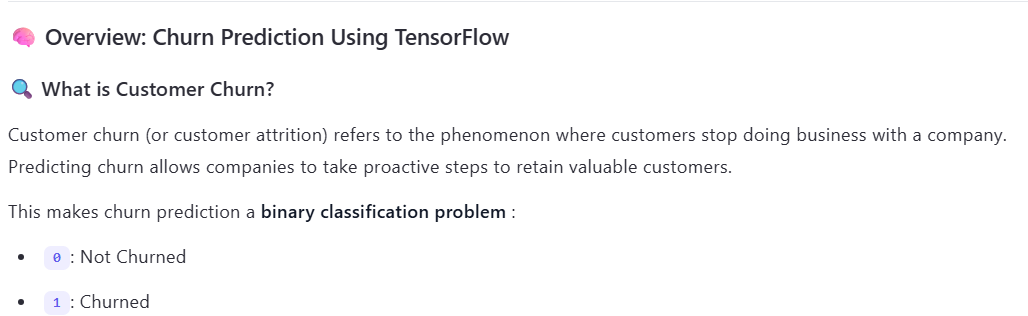

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
np.random.seed(42)
num_samples = 5000

data = {
    'tenure': np.random.randint(1, 73, num_samples),
    'monthly_charges': np.round(np.random.uniform(18, 120, num_samples), 2),
    'total_charges': np.round(np.random.uniform(18, 10000, num_samples), 2),
    'contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_samples),
    'payment_method': np.random.choice(['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'], num_samples),
    'churn': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])
}

df = pd.DataFrame(data)

In [4]:
X = df.drop('churn',axis = 1)
y = df['churn']

In [5]:
categorical_features = ['contract', 'payment_method']
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_preprocessed,y,test_size = 0.2,random_state = 42)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train,y_train,epochs = 20,batch_size = 32,validation_split = 0.2,verbose = 1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7400 - loss: 0.5755 - val_accuracy: 0.8263 - val_loss: 0.4709
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7767 - loss: 0.5348 - val_accuracy: 0.8263 - val_loss: 0.4694
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7975 - loss: 0.5099 - val_accuracy: 0.8263 - val_loss: 0.4771
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7882 - loss: 0.5227 - val_accuracy: 0.8263 - val_loss: 0.4685
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7912 - loss: 0.5154 - val_accuracy: 0.8263 - val_loss: 0.4725
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7796 - loss: 0.5277 - val_accuracy: 0.8263 - val_loss: 0.4736
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7899 - loss: 0.5117 - val_accuracy: 0.8263 - val_loss: 0.4675
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7744 - loss: 0.5327 - val_accuracy: 0.

In [9]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7940


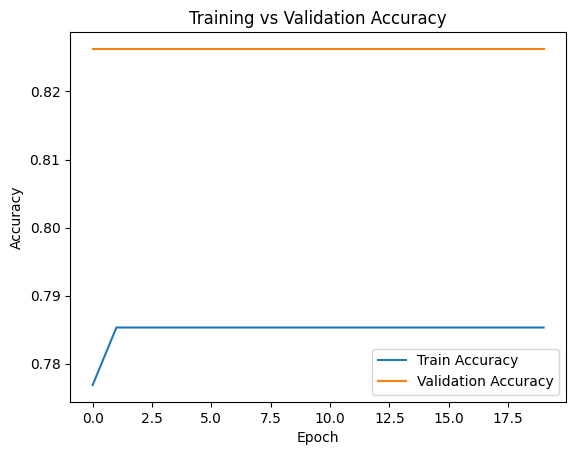

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.save("churn_model.h5")

In [12]:
from tensorflow.keras.models import load_model
loaded_model = load_model("churn_model.h5")

In [13]:
loaded_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = loaded_model.fit(X_train,y_train,epochs = 20,batch_size = 32,validation_split = 0.2,verbose = 1)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7916 - loss: 0.5033 - val_accuracy: 0.8263 - val_loss: 0.4708
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7919 - loss: 0.5045 - val_accuracy: 0.8263 - val_loss: 0.4691
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7899 - loss: 0.5022 - val_accuracy: 0.8263 - val_loss: 0.4742
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7921 - loss: 0.5020 - val_accuracy: 0.8263 - val_loss: 0.4742
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 0.5033 - val_accuracy: 0.8263 - val_loss: 0.4737
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.5010 - val_accuracy: 0.8263 - val_loss: 0.4709
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7857 - loss: 0.5120 - val_accuracy: 0.8263 - val_loss: 0.4726
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7808 - loss: 0.5166 - val_accuracy: 0

In [15]:
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7940
